In [ ]:
import pandas as pd 
import numpy as np
import glob
from tqdm import tqdm
import ast
from matplotlib import pyplot as plt

### Игроки фрод/проверенные - рассматриваем различные гипотезы

Потенциальные мошенники

In [ ]:

fraud = ['HansOnTwitch',
'kirillshevchenko',
'MaximDlugy',
'DanielNaroditsky',
'Jospem',
'CentrumSakkiskola',
'Arash-Tiger',
'Kiborg95' ,
'PaperLL',
'polina131',
'harley-storm',
'Mr-ChessBeastt',
'matyurasov',
'messi2008',
'mume195',
's1lonmaster',
'LimitlessAntler',
'Theee999',
'GoofyCondor',
'WWYDlIKYRN',
'OOTORIKYOUYA',
'seriousness',
'Jimzon',
'janvanrun', 
'V-SAMSONOV',
'Rudoziev',
'xcicadax',
'golfn1',
'JustAnotherStoic', 
'pondababa',
'nomoreban',
'RichScene',
'BlueTreeQ',
'endgametecnic',
'FrogTheGm',
'aline_maulin',
'Louis_GM',
'TheFlex',
'MrGelfand',
'08zimleoH',
'Kei_Shibuya',
'ramtinKKV',
'SomeKurdboy',
'intergr',
'1SClayman',
'BCstandart',
'ATLHOU21'
]

In [ ]:
good = [
    'MagnusCarlsen',
    'VladimirKramnik',
    'Chefshouse',
    'TheVish',
    'lachesisQ',
    'Firouzja2003',
    'GMWSO',
    'Hikaru',
    'yifan0227',
    'ChessQueen',
    'Juwen',
    'LevonAronian',
    'AnisjGiri',
    'Azerichess',
    'GukeshDommaraju',
    'SergeyKarjakin',
    'FormerProdigy',
    'PSvidler',
    'FabianoCaurano',
    'Bigfish1995',
    'igorkovalenko',
    'GukeshDommaraju',
    'Flawless_Fighter',
    'lili_ani',
    'Polish_fighter3000',
    'Grischuk',
    'JuditPolgar',
    'annamaja',
    'annacramling',
    'DominezOnYoutube']

In [ ]:
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + " " + df['StartTime'].astype(str))
df = df.sort_values(by=['Player','datetime'])

In [ ]:
from tqdm import tqdm
tqdm.pandas()

def compute_avg(group, col):
    scores = []
    res = []
    for _, row in group.iterrows():
        if scores:
            avg = sum(scores) / len(scores)
            res.append(avg)
        else:
            res.append(None)
        if row['Tournament_is_tt']:
            scores.append(row[col])
    return pd.Series(res, index=group.index)

Подсчет статистик для титульных вторников

In [ ]:
df['tt_mean_coin_frac_d'] = df.groupby('Player').progress_apply(lambda x: compute_avg(x, 'coin_frac_d')).reset_index(level=0, drop=True)

In [ ]:
df.to_csv('bigstatsdata_v5_players')

In [ ]:

df['tt_mean_coin_frac_m'] = df.groupby('Player').apply(lambda x: compute_avg(x, 'coin_frac_m')).reset_index(level=0, drop=True)
df['tt_mean_coin_frac_e'] = df.groupby('Player').apply(lambda x: compute_avg(x, 'coin_frac_e')).reset_index(level=0, drop=True)

In [ ]:
df.to_csv('bigstatsdata_v6_players')

In [ ]:
df['tt_mean_coin_frac_m_18'] = df.groupby('Player').apply(lambda x: compute_avg(x, 'coin_frac_m_18')).reset_index(level=0, drop=True)
df['tt_mean_coin_frac_e_18'] = df.groupby('Player').apply(lambda x: compute_avg(x, 'coin_frac_e_18')).reset_index(level=0, drop=True)
df['tt_mean_coin_frac_d_19'] = df.groupby('Player').progress_apply(lambda x: compute_avg(x, 'coin_frac_d_18')).reset_index(level=0, drop=True)

In [ ]:
#дисперсия по времени
df['tt_mean_var_time_d'] = df.groupby('Player').apply(lambda x: compute_avg(x, 'var_time_d')).reset_index(level=0, drop=True)
df['tt_mean_var_time_m'] = df.groupby('Player').apply(lambda x: compute_avg(x, 'var_time_m')).reset_index(level=0, drop=True)
df['tt_mean_var_time_e'] = df.groupby('Player').apply(lambda x: compute_avg(x, 'var_time_e')).reset_index(level=0, drop=True)

In [ ]:
df.to_csv('bigstatsdata_v8_players')

In [ ]:
#время хода среднее при совпадении
df['tt_mean_times_d_c'] = df.groupby('Player').apply(lambda x: compute_avg(x, 'mean_times_d_c')).reset_index(level=0, drop=True)
df['tt_mean_times_m_c'] = df.groupby('Player').apply(lambda x: compute_avg(x, 'mean_times_m_c')).reset_index(level=0, drop=True)
df['tt_mean_times_e_c'] = df.groupby('Player').apply(lambda x: compute_avg(x, 'mean_times_e_c')).reset_index(level=0, drop=True)

### Квантили доли совпадений по elo рейтингу

In [ ]:
bin_size = 50
bins = np.arange(df['Elo'].min(), df['Elo'].max() + bin_size, bin_size)

In [ ]:

mean_coinc = []
lower_bounds = []
upper_bounds = []

for i in range(len(bins) - 1):
    bin_data = df[(df['Elo'] >= bins[i]) & (df['Elo'] < bins[i + 1])]
    if len(bin_data) > 0:
        frac = (bin_data['coin_d'].astype(int).to_numpy() + bin_data['coin_m'].astype(int).to_numpy() + bin_data['coin_e'].astype(int).to_numpy())/bin_data['Moves_length'].astype(int)
        mean = frac.mean()
        std_err = stats.sem(frac)
        ci = stats.t.interval(0.95, len(bin_data) - 1, loc=mean, scale=std_err)
        print(frac)

        mean_coinc.append(mean)
        lower_bounds.append(ci[0])
        upper_bounds.append(ci[1])
    else:
        print(bins[i])
        mean_coinc.append(np.nan)
        lower_bounds.append(np.nan)
        upper_bounds.append(np.nan)

bin_centers = bins[:-1] + bin_size / 2

In [ ]:
df['elo_coin_q15'] = lower_bounds + (upper_bounds - lower_bounds)*0.15
df['elo_coin_q95'] = lower_bounds + (upper_bounds - lower_bounds)*0.95

### Анализ по игрокам

In [32]:
df['month'] = df['Date'].apply(lambda x: x[0:7])

Точность в партии по месяцам

In [60]:
def accur(games, name):
    games = games.sort_values(by=['month'])
    mean_acc_m = games.groupby('month')['coin_frac_m'].mean().reset_index()
    mean_acc_e = games.groupby('month')['coin_frac_e'].mean().reset_index()
    
    # mean_elo = games.groupby('month').apply(lambda x: np.mean(x['Elo'])).reset_index(level=0, drop=True)
    plt.plot(mean_acc_m['month'], mean_acc_m['coin_frac_m'], label='coin frac in mit')
    plt.plot(mean_acc_e['month'], mean_acc_e['coin_frac_e'], label='coin frac in end')
    plt.plot(mean_acc_m['month'], (mean_acc_m['coin_frac_m'] + mean_acc_e['coin_frac_e']) / 2, label='coin frac')
    plt.title(f'{name}: month/mean_coin_frac')
    plt.xlabel('month')
    plt.xlabel('mean_coin_frac in mit')
    plt.legend()
    plt.xticks(rotation=85)
    plt.show()

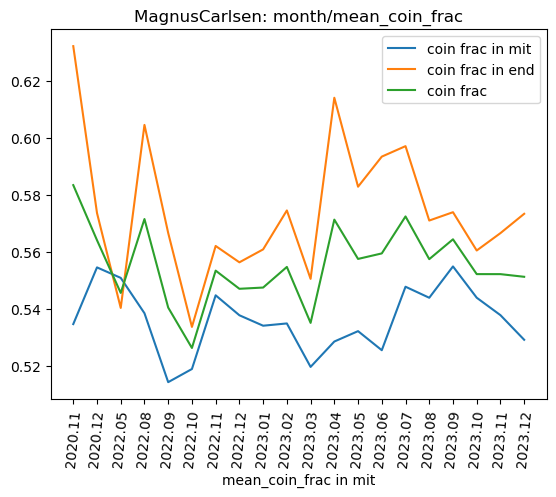

In [61]:
games = df[df['Player'] == 'MagnusCarlsen']
accur(games, 'MagnusCarlsen')

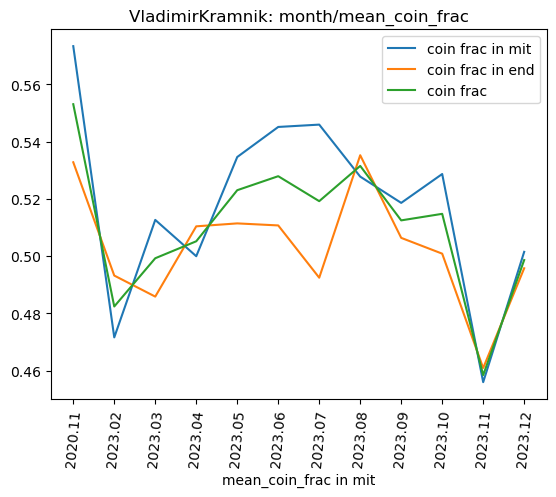

In [62]:
games = df[df['Player'] == 'VladimirKramnik']
accur(games, 'VladimirKramnik')

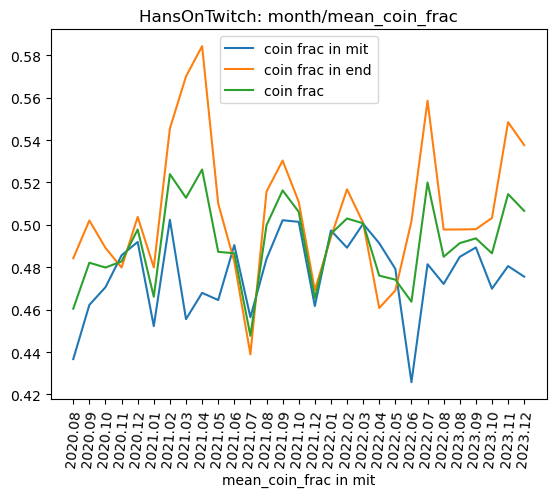

In [63]:
games = df[df['Player'] == 'HansOnTwitch']
accur(games, 'HansOnTwitch')

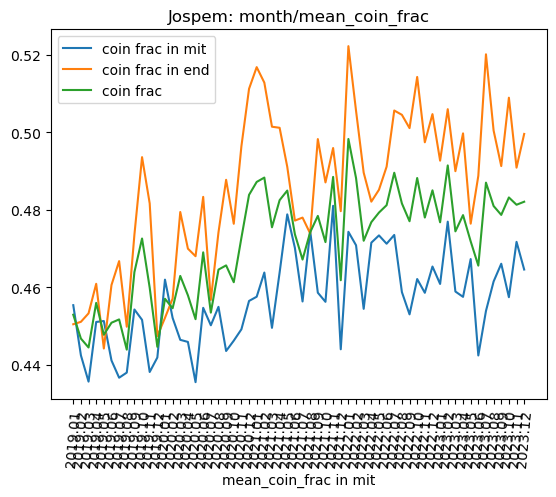

In [64]:
games = df[df['Player'] == 'Jospem']
accur(games, 'Jospem')

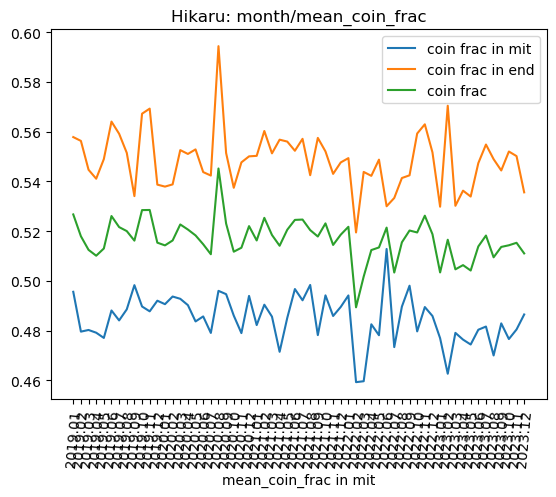

In [65]:
games = df[df['Player'] == 'Hikaru']
accur(games, 'Hikaru')

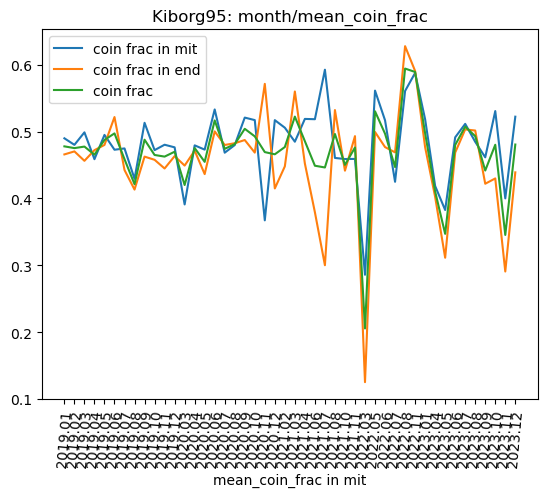

In [66]:
games = df[df['Player'] == 'Kiborg95']
accur(games, 'Kiborg95')

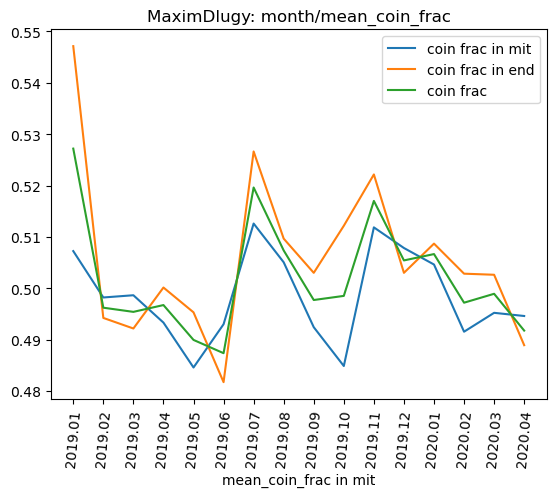

In [67]:
games = df[df['Player'] == 'MaximDlugy']
accur(games, 'MaximDlugy')

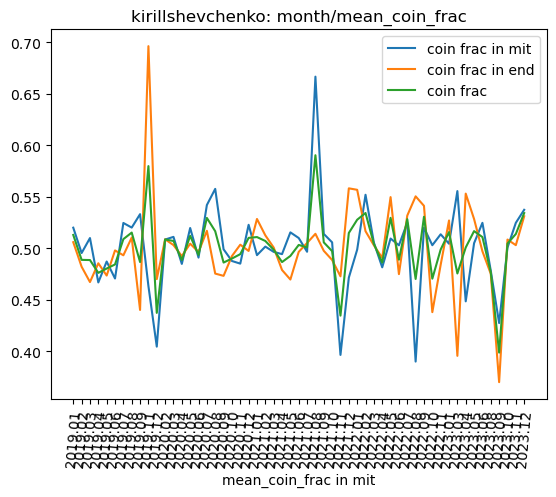

In [68]:
games = df[df['Player'] == 'kirillshevchenko']
accur(games, 'kirillshevchenko')

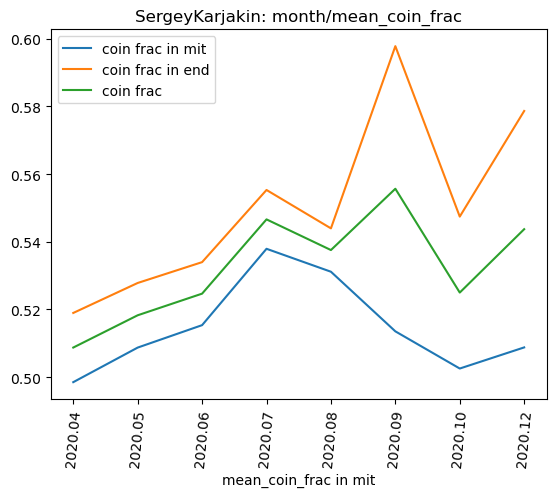

In [69]:
games = df[df['Player'] == 'SergeyKarjakin']
accur(games, 'SergeyKarjakin')

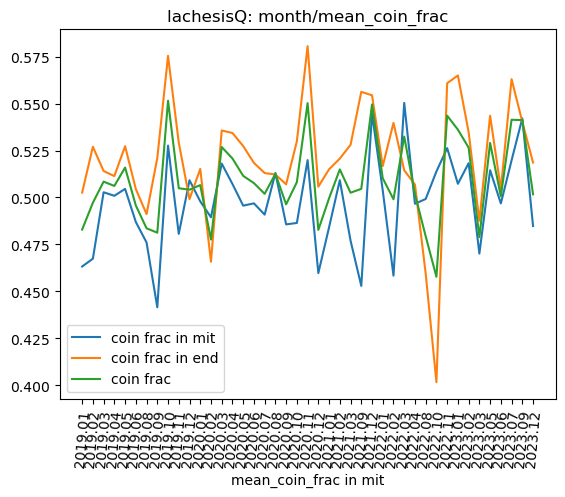

In [70]:
games = df[df['Player'] == 'lachesisQ']
accur(games, 'lachesisQ')

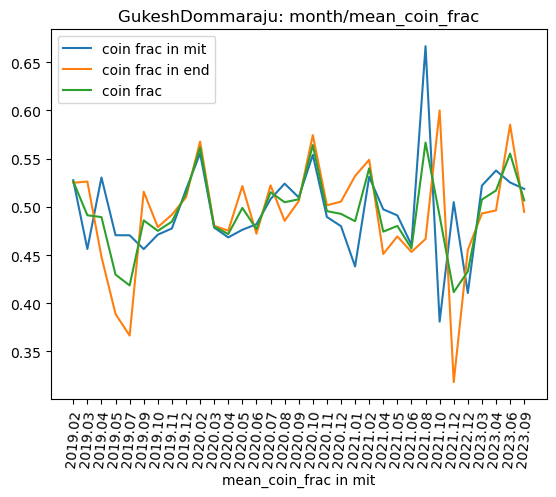

In [71]:
games = df[df['Player'] == 'GukeshDommaraju']
accur(games, 'GukeshDommaraju')

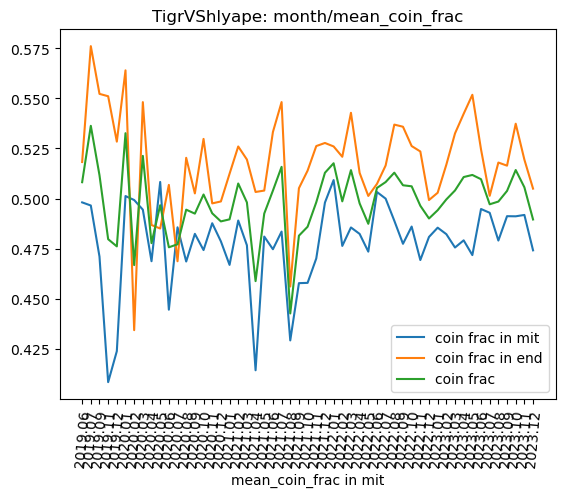

In [75]:
games = df[df['Player'] == 'TigrVShlyape']
accur(games, 'TigrVShlyape')


### Точность в рамках турнира

In [118]:
import matplotlib.pyplot as plt
def draw_plot_tournament(name, tournament):
    dn_games_w = df[df['White'] == name]
    dn_games_b = df[df['Black'] == name]
    dn_games = pd.concat([dn_games_w, dn_games_b])
    dn_games = dn_games[dn_games['Tournament_long'] == tournament]
    dn_games = dn_games.sort_values(by=['Date', 'StartTime'], ascending=[True, True])
    dn_games
    mid_scores = []
    end_scores = []
    all_scores = []
    for _, row in dn_games.iterrows():
        if row['White'] == name:
            mid_scores.append(row['coin_w_frac_m'])
            end_scores.append(row['coin_w_frac_e'])
            all_scores.append((row['coin_w_frac_m'] + row['coin_w_frac_e'])/2)
        else:
            mid_scores.append(row['coin_b_frac_m'])
            end_scores.append(row['coin_b_frac_e'])
            all_scores.append((row['coin_b_frac_m'] + row['coin_b_frac_e'])/2)
    plt.xlabel('Порядковый номер игры')
    plt.ylabel('Доля совпадений со stockfish')
    plt.plot(mid_scores, label='миттельшпиль')
    plt.plot(end_scores, label='эндшпиль')
    plt.plot(all_scores, label='общее')
    plt.legend()
    plt.title(f'{name}: Доля совпадений в {tournament}')
    plt.show()

хорошие игроки

In [76]:
df = pd.read_parquet('withtourlong_new')

In [136]:
name = 'Hikaru'
dn_games_w = df[df['White'] == name]
dn_games_b = df[df['Black'] == name]
dn_games = pd.concat([dn_games_w, dn_games_b])

dn_games.head(30)

,Date,White,Black,Tournament,WhiteElo,BlackELo,StartTime,Tournament_long,coin_w_frac_d,coin_w_frac_m,coin_w_frac_e,coin_b_frac_d,coin_b_frac_m,coin_b_frac_e
24,2021.04.06,Hikaru,Sibelephant,titled-tuesday,3237,3116,18:38:30,-titled-tuesday-blitz-2226691,0.2,0.539683,0.500000,0.2,0.571429,0.208333
148,2021.06.29,Hikaru,Oleksandr_Bortnyk,titled-tuesday,3155,3038,18:42:06,titled-tuesday-blitz-june-29-2021-2428655,0.4,0.400000,0.307692,0.2,0.654545,0.461538
857,2022.06.07,Hikaru,exoticprincess,titled-tuesday,3194,3021,22:32:58,late-titled-tuesday-blitz-june-07-2022-3192103,0.6,0.254545,0.578947,0.8,0.509091,0.263158
1359,2022.09.20,Hikaru,K_A_S_T_O_R,titled-tuesday,3238,2829,22:08:24,late-titled-tuesday-blitz-september-20-2022-34...,0.0,0.392157,0.684211,0.2,0.470588,0.263158
1702,2023.03.14,Hikaru,TimofeevAr,titled-tuesday,3188,2898,15:19:42,early-titled-tuesday-blitz-march-14-2023-3894520,0.4,0.352941,0.500000,0.2,0.274510,0.166667
2176,2021.04.06,Hikaru,Oleksandr_Bortnyk,titled-tuesday,3226,2950,18:10:54,-titled-tuesday-blitz-2226691,0.8,0.350515,0.454545,0.6,0.350515,0.363636
2276,2021.06.08,Hikaru,TigrVShlyape,titled-tuesday,3186,2883,18:10:12,titled-tuesday-blitz-june-08-2021-2384337,0.6,0.545455,0.714286,0.4,0.545455,0.571429
2374,2021.09.14,Hikaru,Zhigalko_Sergei,titled-tuesday,3184,2953,18:00:22,titled-tuesday-blitz-september-14-2021-2596840,0.0,0.424242,0.692308,0.4,0.545455,0.461538
2417,2021.11.02,Hikaru,Zhigalko_Sergei,titled-tuesday,3279,2962,18:21:32,titled-tuesday-blitz-november-02-2021-2688099,0.4,0.602740,0.448980,0.2,0.493151,0.448980
2494,2019.04.02,Hikaru,gmjoey1,titled-tuesday,3185,2503,20:59:57,-titled-tuesday-blitz-1051389,0.4,0.567164,0.468085,0.4,0.388060,0.468085


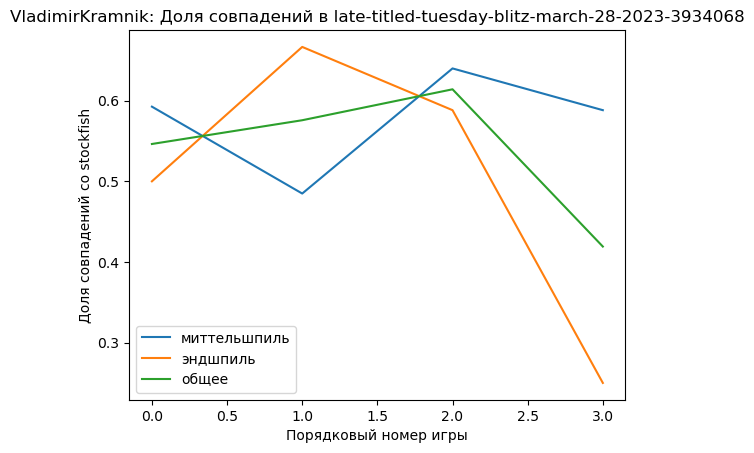

In [120]:
draw_plot_tournament('VladimirKramnik', 'late-titled-tuesday-blitz-march-28-2023-3934068')

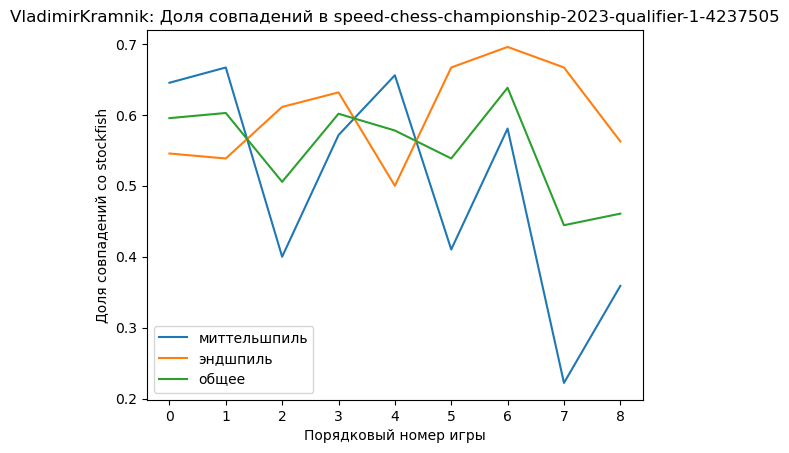

In [121]:
draw_plot_tournament('VladimirKramnik', 'speed-chess-championship-2023-qualifier-1-4237505')

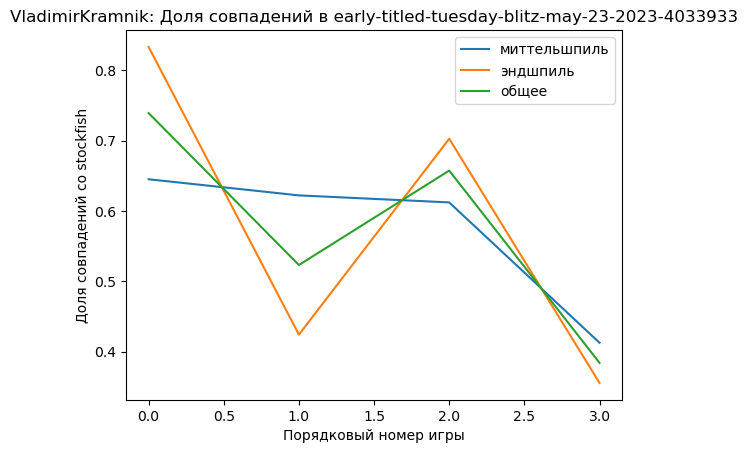

In [127]:
draw_plot_tournament('VladimirKramnik', 'early-titled-tuesday-blitz-may-23-2023-4033933')

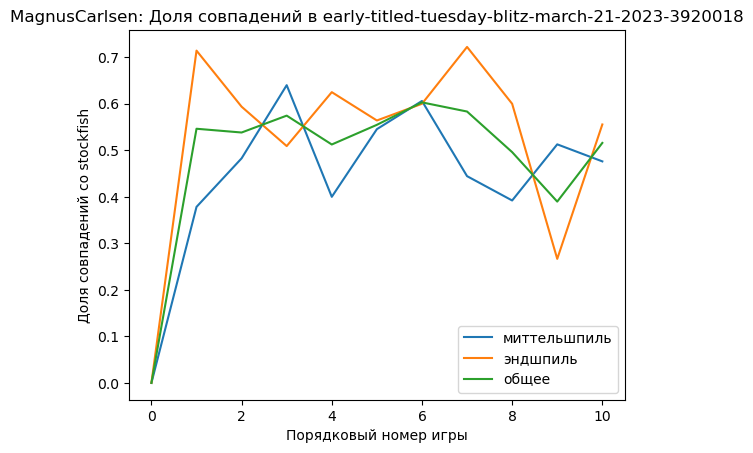

In [129]:
draw_plot_tournament('MagnusCarlsen', 'early-titled-tuesday-blitz-march-21-2023-3920018')

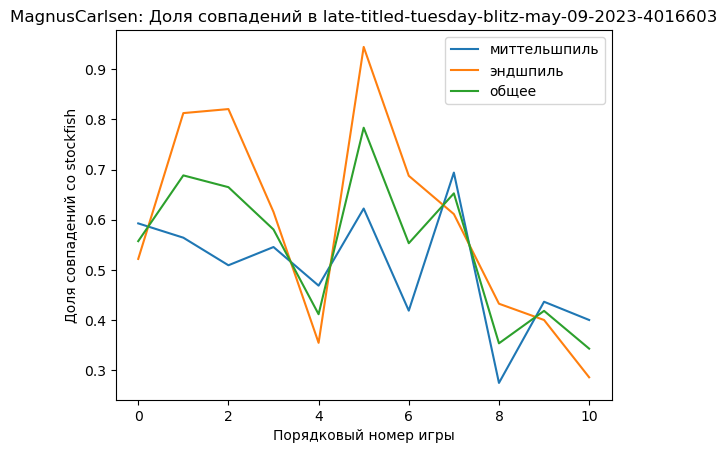

In [135]:
draw_plot_tournament('MagnusCarlsen', 'late-titled-tuesday-blitz-may-09-2023-4016603')

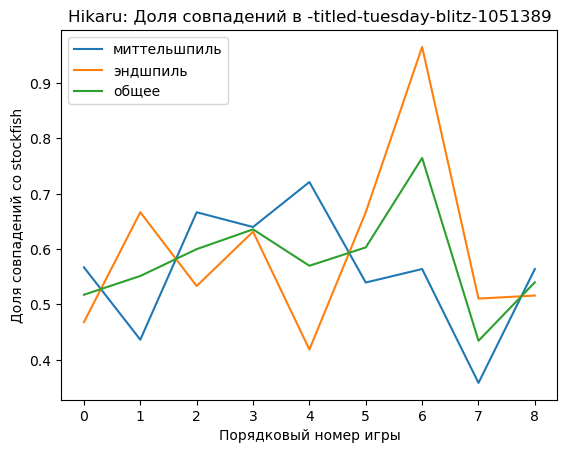

In [140]:
draw_plot_tournament('Hikaru', '-titled-tuesday-blitz-1051389')

Потенциальные мошенники

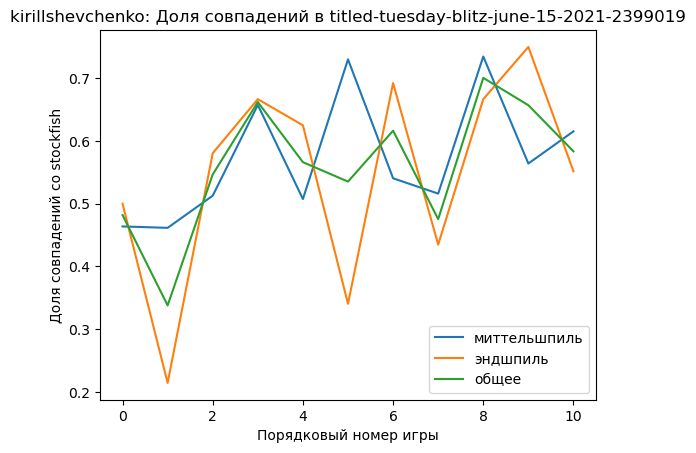

In [105]:
draw_plot_tournament('kirillshevchenko', 'titled-tuesday-blitz-june-15-2021-2399019')

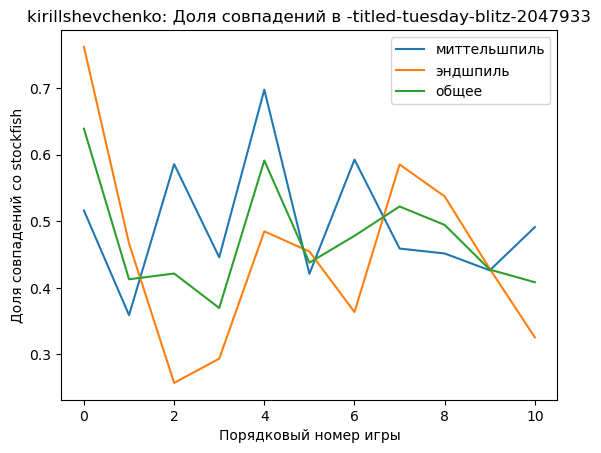

In [107]:
draw_plot_tournament('kirillshevchenko', '-titled-tuesday-blitz-2047933')

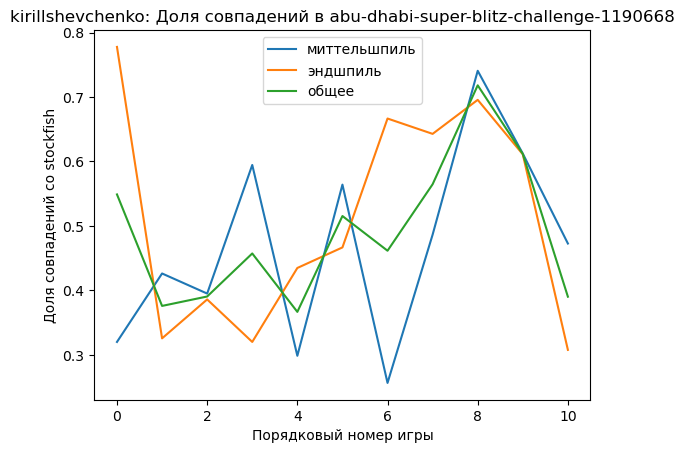

In [109]:
draw_plot_tournament('kirillshevchenko', 'abu-dhabi-super-blitz-challenge-1190668')

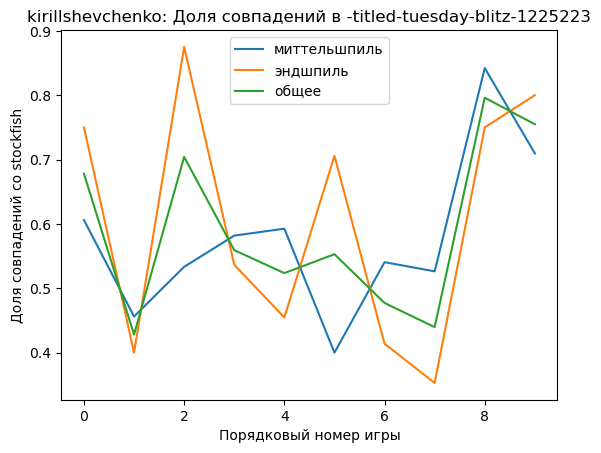

In [101]:
draw_plot_tournament('kirillshevchenko', '-titled-tuesday-blitz-1225223')

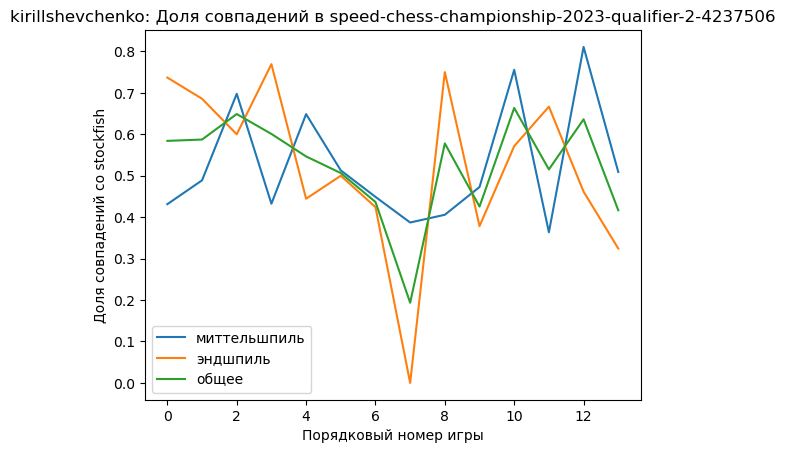

In [100]:
draw_plot_tournament('kirillshevchenko', 'speed-chess-championship-2023-qualifier-2-4237506')

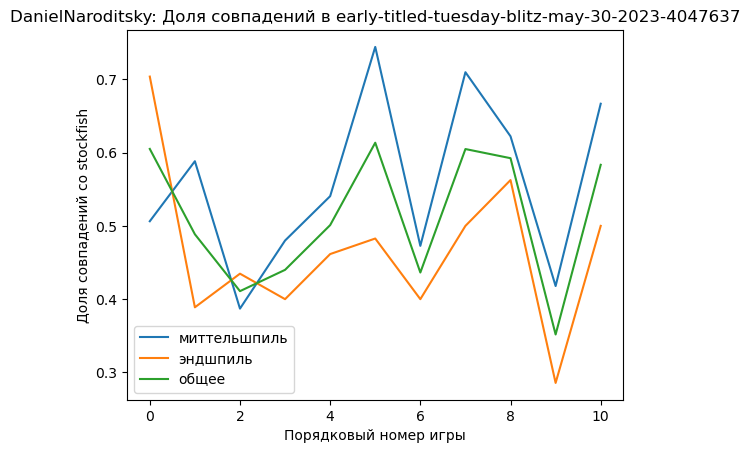

In [92]:
draw_plot_tournament('DanielNaroditsky', 'early-titled-tuesday-blitz-may-30-2023-4047637')

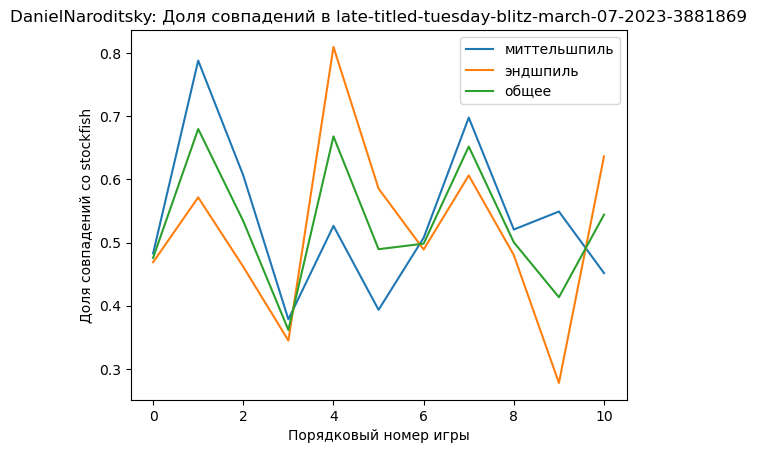

In [112]:
draw_plot_tournament('DanielNaroditsky', 'late-titled-tuesday-blitz-march-07-2023-3881869')

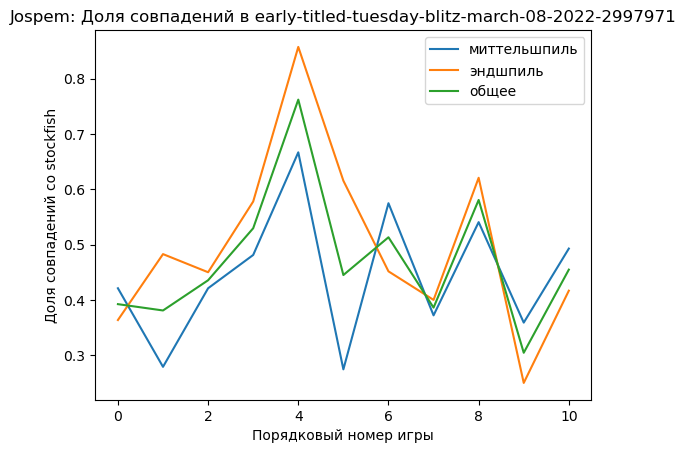

In [93]:
draw_plot_tournament('Jospem', 'early-titled-tuesday-blitz-march-08-2022-2997971')

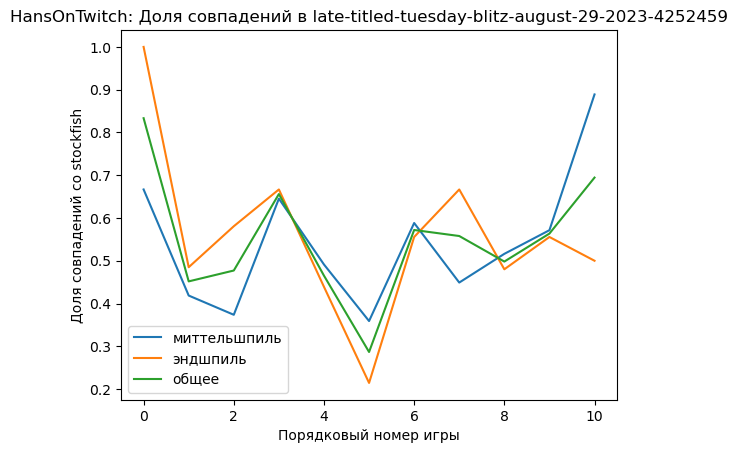

In [114]:
draw_plot_tournament('HansOnTwitch', 'late-titled-tuesday-blitz-august-29-2023-4252459')

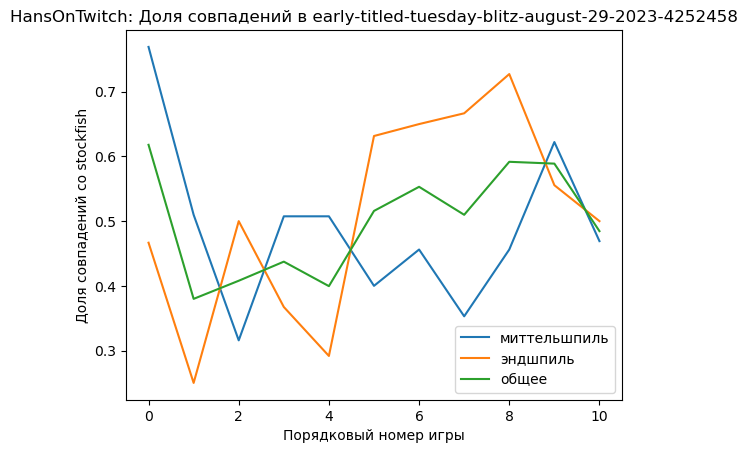

In [117]:
draw_plot_tournament('HansOnTwitch', 'early-titled-tuesday-blitz-august-29-2023-4252458'	)

### Доверительные интервалы для точности

In [227]:
df = pd.read_csv('bigstatsdata_v11_players_without_last')

In [248]:
import scipy.stats as stats
def dov_int(name):
    df_name = df[df['Player'] == name]
    bin_size = 50
    bins = np.arange(df_name['Elo'].min(), df_name['Elo'].max() + bin_size, bin_size)
    mean_coinc = []
    mean_coinc_name = []
    lower_bounds = []
    upper_bounds = []
    lower_bounds_name = []
    upper_bounds_name = []

    for i in range(len(bins) - 1):
        bin_data = df[(df['Elo'] >= bins[i]) & (df['Elo'] < bins[i + 1])]
        bin_data_name = df_name[(df_name['Elo'] >= bins[i]) & (df_name['Elo'] < bins[i + 1])]
        if len(bin_data) > 0:
            frac = bin_data['coin_frac_m'].to_numpy()
            # print(frac)
            frac_name = bin_data_name['coin_frac_e'].to_numpy()
            mean = frac.mean()
            mean_name = frac_name.mean()
            std_err = stats.sem(frac)
            ci = stats.t.interval(0.95, len(bin_data) - 1, loc=mean, scale=std_err)
            
            std_err_name = stats.sem(frac_name)
            ci_name = stats.t.interval(0.95, len(bin_data_name) - 1, loc=mean_name, scale=std_err_name)
            
            mean_coinc_name.append(mean_name)
            mean_coinc.append(mean)
            lower_bounds.append(ci[0])
            upper_bounds.append(ci[1])
            lower_bounds_name.append(ci_name[0])
            upper_bounds_name.append(ci_name[1])
        else:
            mean_coinc.append(np.nan)
            lower_bounds.append(np.nan)
            upper_bounds.append(np.nan)
            
            mean_coinc_name.append(np.nan)
            lower_bounds_name.append(np.nan)
            upper_bounds_name.append(np.nan)

    bin_centers = bins[:-1] + bin_size / 2

    plt.figure(figsize=(10,6))
    plt.plot(bin_centers, mean_coinc, marker='o', label='Средняя доля совпадений по всем игрокам')
    plt.plot(bin_centers, mean_coinc_name, marker='o', label=f'Средняя доля совпадений {name}')
    plt.fill_between(bin_centers, lower_bounds_name, upper_bounds_name, color='g', alpha = 0.2, label = f'confidence interval (95%) {name}')
    plt.fill_between(bin_centers, lower_bounds, upper_bounds, color='b', alpha = 0.2, label = 'confidence interval (95%)')
    plt.xlabel('Elo')
    plt.ylabel('Доля совпадений')
    plt.legend()
    plt.title('Доверительный интервал для бинов рейтинга')
    plt.grid()
    plt.show()

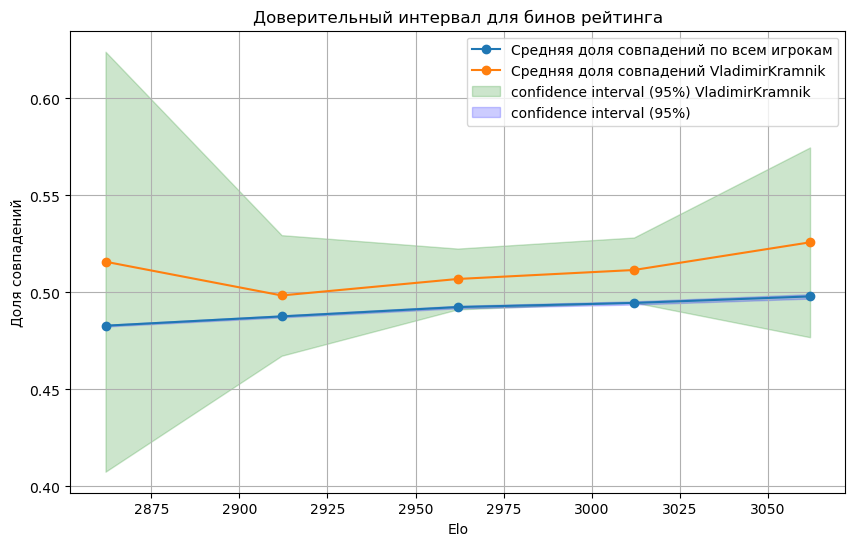

In [249]:
dov_int('VladimirKramnik')

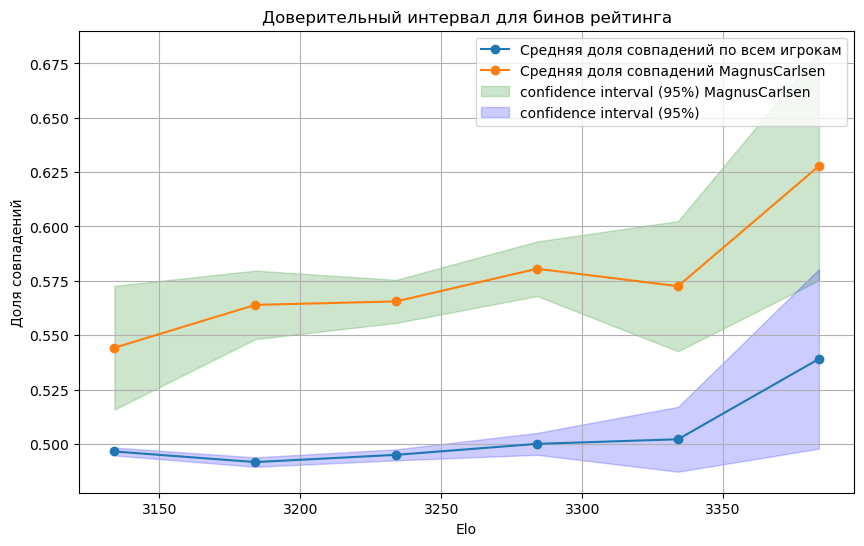

In [250]:
dov_int('MagnusCarlsen')

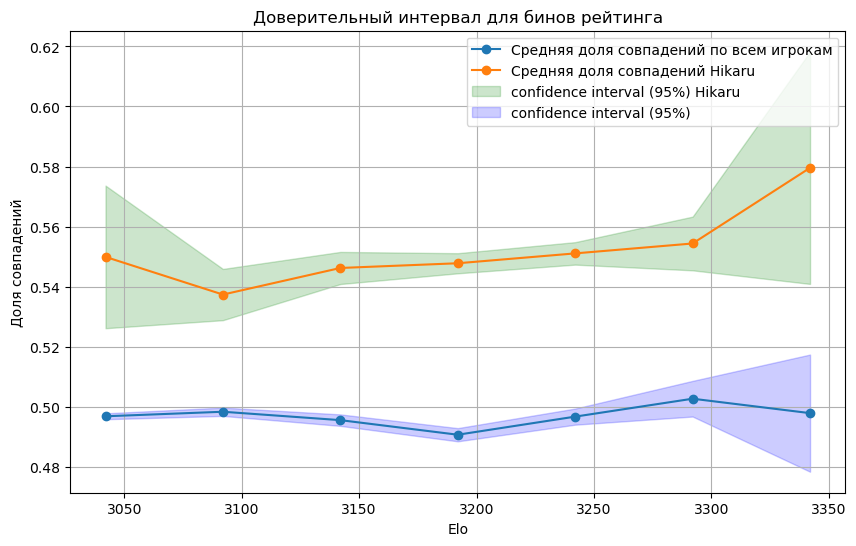

In [251]:
dov_int('Hikaru')

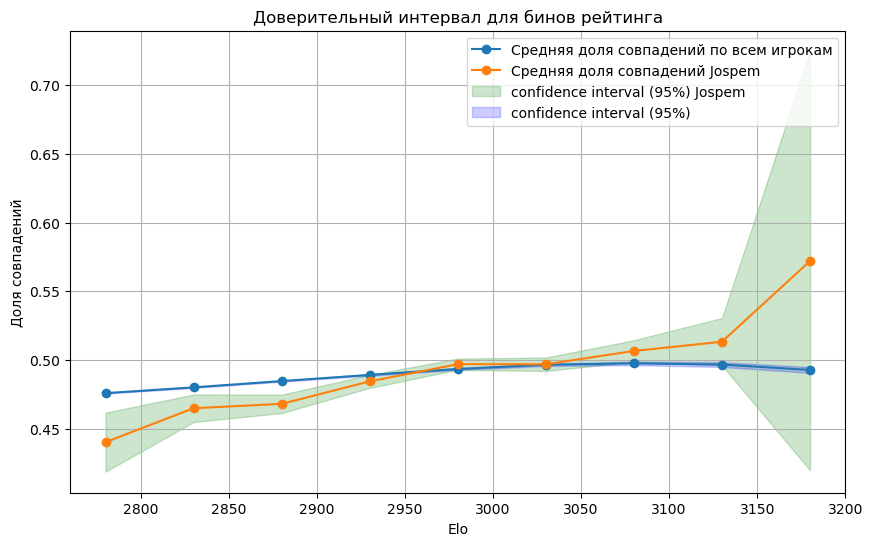

In [252]:
dov_int('Jospem')

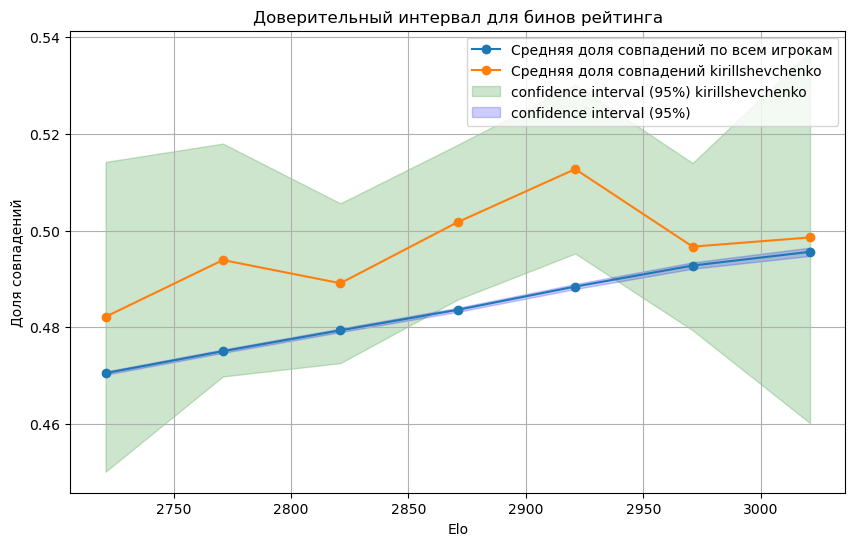

In [253]:
dov_int('kirillshevchenko')

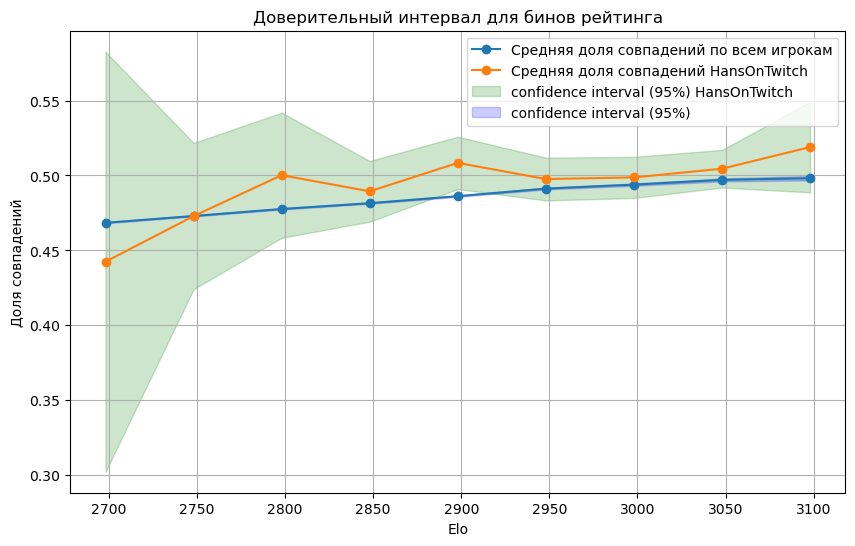

In [254]:
dov_int('HansOnTwitch')

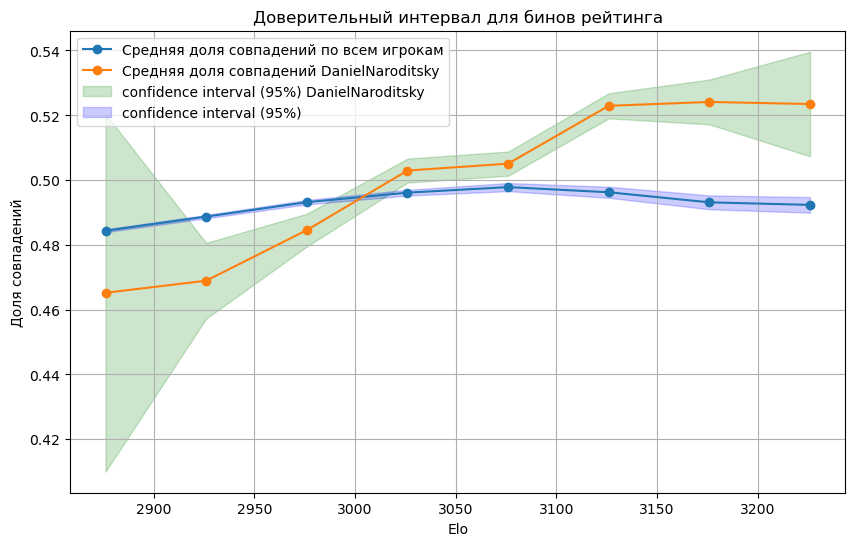

In [255]:
dov_int('DanielNaroditsky')

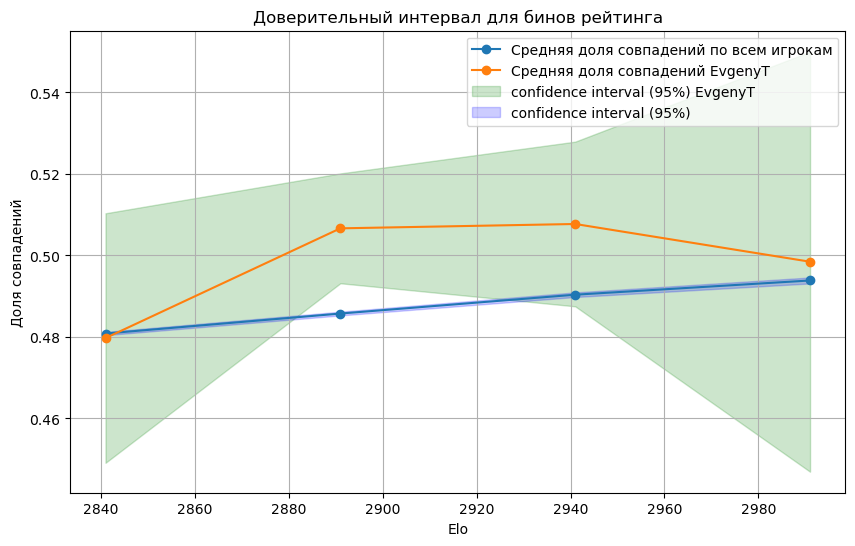

In [256]:
dov_int('EvgenyT')

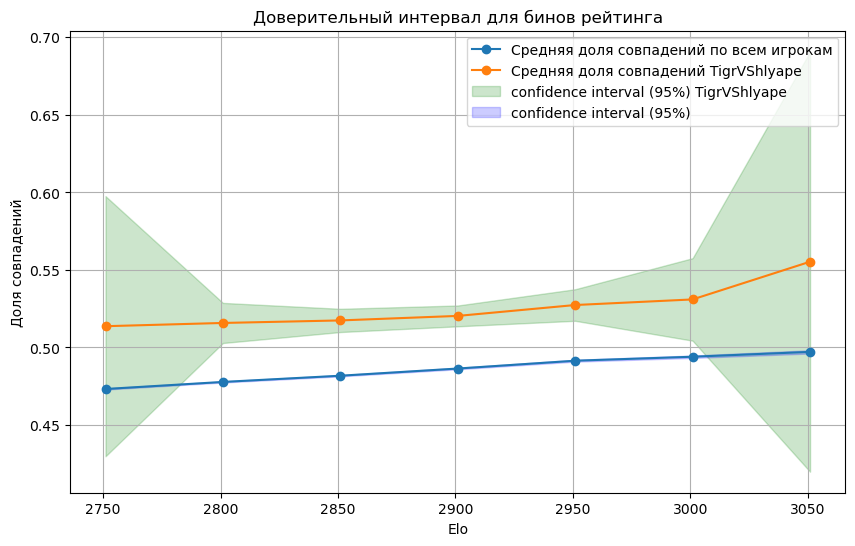

In [237]:
dov_int('TigrVShlyape')

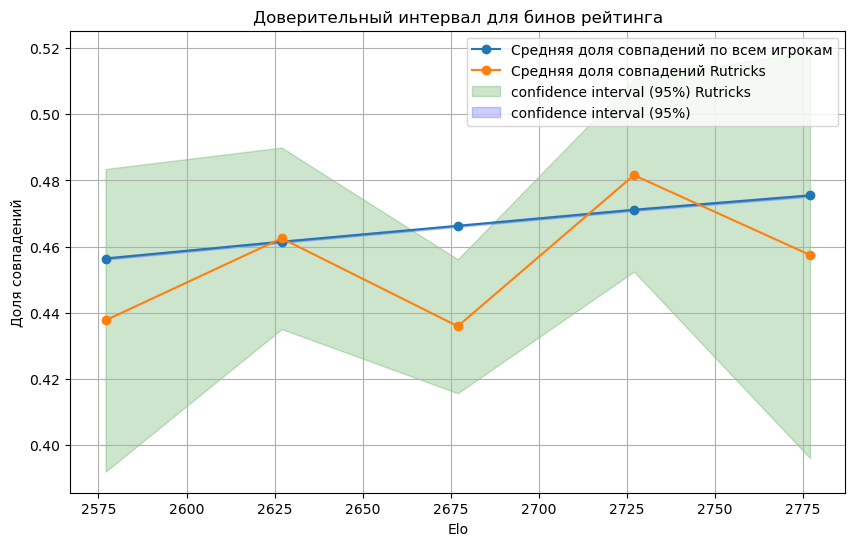

In [238]:
dov_int('Rutricks')

/opt/app-root/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/app-root/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


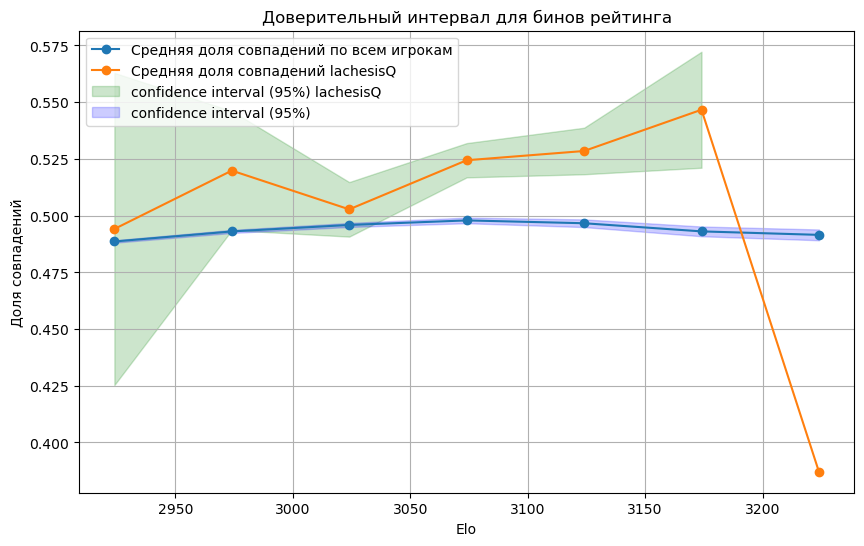

In [239]:
dov_int('lachesisQ')

In [243]:
df_all['month'] = df_all['Date'].apply(lambda x: x[0:7])
magnus = df_all[df_all['Player'] == 'VladimirKramnik']
magnus = magnus.sort_values(by=['month'])
magnus = magnus[magnus['mean_cp'] < 0]
magnus_mean_cp = magnus.groupby('month').apply(lambda x: np.mean(x['mean_cp'])).reset_index(level=0, drop=True)
magnus_mean_elo = magnus.groupby('month').apply(lambda x: min(x['month'])).reset_index(level=0, drop=True)

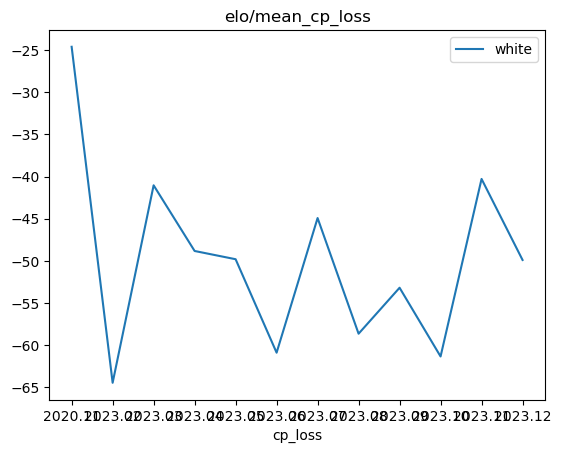

In [244]:
plt.plot( magnus_mean_elo, magnus_mean_cp, label='white')
plt.title('elo/mean_cp_loss')
plt.xlabel('elo')
plt.xlabel('cp_loss')
plt.legend()
plt.show()

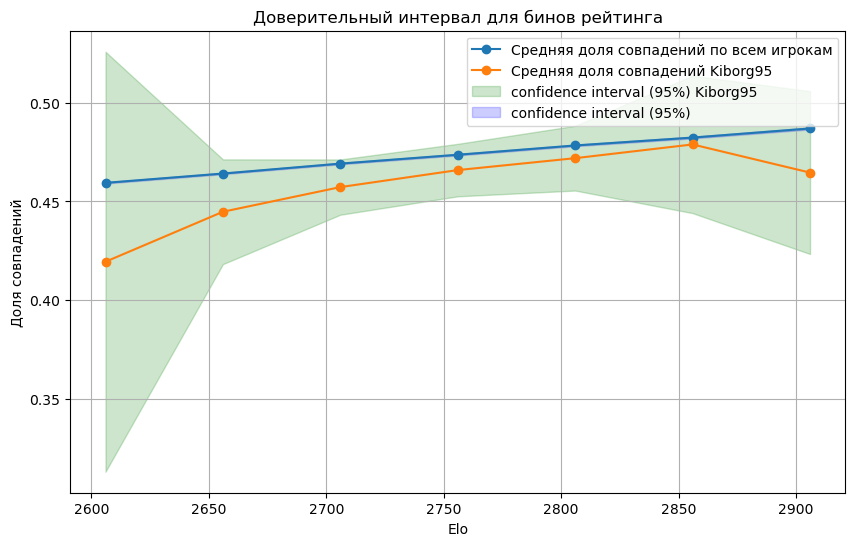

In [262]:
dov_int('Kiborg95')

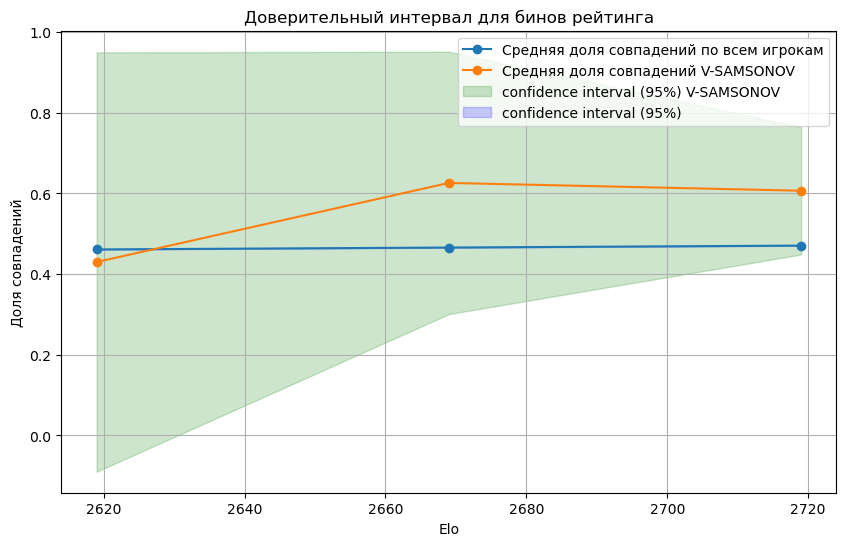

In [269]:
dov_int('V-SAMSONOV')